# Sample space reducing cascading processes produce the full spectrum of scaling exponents

In [85]:
# First I start by importing the necessary libraries 
import numpy as np # I will use it for ranom number generation and array manipilation
import matplotlib.pyplot as plt # I will use it for visulizations 
from tqdm import tqdm # I will use it for progress bars 
from collections import defaultdict
from scipy.optimize import curve_fit # Will be used to fit zipfs law 

1. The ball is only allowed to randomly go to lower states 

In [150]:
# Generating a naive SSR
visited = defaultdict(int) # Dictionary to store the state and how many it was visited 
max_iter = 100_000 # Number of iterations 
N = 10 # The total number of states
states = [state for state in range(1, 21, 1)]
current_state = N 
visited[current_state] = 1
for i in range(max_iter):
    next_state = np.random.choice(np.arange(1, current_state))
    current_state = next_state 
    visited[next_state] +=1 
    if current_state == 1:
        current_state = N
# COmputing the total number of vistes 
total_num_visits = sum(visited.values())
# Computing the frequency of visits per state 
visited = {k: v/total_num_visits for k, v in visited.items()}

In [151]:
# I will interpolate zipfs law with the data to figure out the constant C
def zipf(r, C):
    return C / r 
states = [state for state in visited.keys()]
freqs = [freq for freq in visited.values()]
popt, _ = curve_fit(zipf, states, freqs)
states.sort() # Sorting the staets list to use the array for ploting the fitted line 

In [134]:
# Prinitng the value of C 
popt[0] 

np.float64(0.28080497073522837)

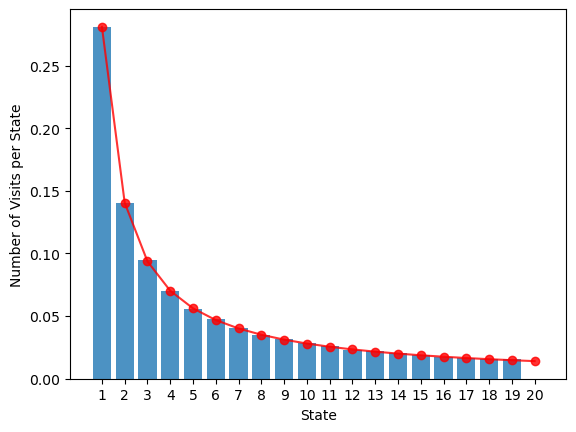

In [137]:
# Fit the curve using scipy.optimize
plt.bar(visited.keys(), visited.values(), alpha=0.8)
plt.plot(states, zipf(states, popt[0]), marker="o", color="red", alpha=0.8)
plt.xlabel('State')
plt.ylabel('Number of Visits per State')
plt.xticks(states)
# plt.title('Frequency of vists')
plt.show()

The process follows zipf's law with a parameter $C= 0.28$

2. The ball can go to lower states with probability $\lambda \in [0, 1]$ and higher states with probability $1-\lambda$

In [149]:
# Generating a naive SSR
# NOTE: there is a bug with the random choice when the current state is equal to lower of upper bound of 
# np.random.choice function. fix that 
# NOTE: Also use a json file to store the configuration of the expriements 
# NOTE: Refactor the code in a functional form 

visited = defaultdict(int) # Dictionary to store the state and how many it was visited 
max_iter = 10_000 # Number of iterations 
N = 10 # The total number of states
lam = 0.2 # Transition probability 
states = [state for state in range(1, 21, 1)]
current_state = N 
visited[current_state] = 1
for i in range(max_iter):
    u = np.random.randn() # Random number
    print(f"Current state: {current_state}")
    if current_state == N:
        next_state = np.random.choice(np.arange(1, current_state))
    elif current_state == 1:
        next_state = np.random.choice(np.arange(2, current_state))    
    else:
        if u < lam: 
            next_state = np.random.choice(np.arange(1, current_state))
        else: 
            next_state = np.random.choice(np.arange(current_state, N))
    # next_state = np.random.choice(np.arange(1, current_state))
    current_state = next_state 
    visited[next_state] +=1 
    # if current_state == 1:
    #     current_state = N
# COmputing the total number of vistes 
total_num_visits = sum(visited.values())
# Computing the frequency of visits per state 
visited = {k: v/total_num_visits for k, v in visited.items()}

Current state: 10
Current state: 5
Current state: 7
Current state: 9
Current state: 3
Current state: 7
Current state: 1


ValueError: 'a' cannot be empty unless no samples are taken

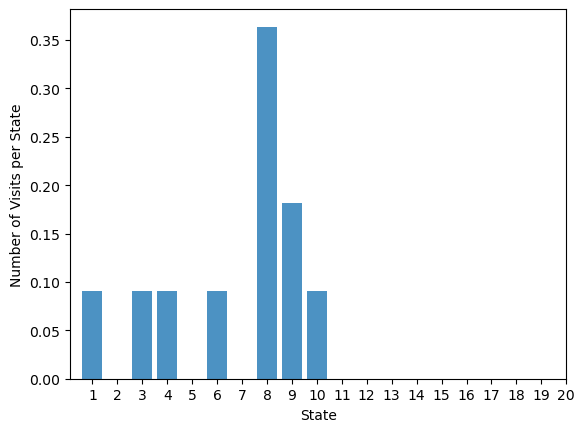

In [145]:
plt.bar(visited.keys(), visited.values(), alpha=0.8)
# plt.plot(states, zipf(states, popt[0]), marker="o", color="red", alpha=0.8)
plt.xlabel('State')
plt.ylabel('Number of Visits per State')
plt.xticks(states)
# plt.title('Frequency of vists')
plt.show()